# PART2_ENV

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reward_map_1 = np.zeros([10,10])
reward_map_1[2:4,5:7] = -1
reward_map_1[4:6,1:3] = -1
reward_map_1[8:10,2:4] = -1
reward_map_1[9,9] = 1

In [3]:
reward_map_2 = np.zeros([10,10])
reward_map_2[1:7,4] = -100
reward_map_2[1,4:7] = -100
reward_map_2[1:4,6] = -100
reward_map_2[3,6:9] = -100
reward_map_2[3:8,8] = -100
reward_map_2[3:8,8] = -100
reward_map_2[7,6:9] = -100
reward_map_2[8,6] = -100
reward_map_2[9,9] = 10

In [4]:
def plot_heatmap(reward):
    fig,ax = plt.subplots(figsize=(10, 8))

    c = plt.pcolor(reward[np.arange(9,-1,-1),:], edgecolors='k', linewidths=1, cmap='RdBu')

    plt.xticks(np.arange(11))
    plt.yticks(np.arange(11))

    ax.set_xticklabels([str(x) for x in np.arange(11)])
    ax.set_yticklabels([str(10-y) for y in np.arange(11)])

    fig.colorbar(c, ax=ax)

In [5]:
def plot_text(reward):
    fig,ax = plt.subplots(figsize=(8, 8))
    
    for x in range(10):
        for y in range(10):
            plt.text(0.3+x,0.3+y,str(round(reward[9-y,x], 3)))
    
    plt.xticks(np.arange(11))
    plt.yticks(np.arange(11))

    ax.set_xticklabels([str(x) for x in np.arange(11)])
    ax.set_yticklabels([str(10-y) for y in np.arange(11)])
    
    plt.grid()
    plt.show()

In [6]:
def plot_arrow(action):
    fig,ax = plt.subplots(figsize=(8, 8))
    
    for x in range(10):
        for y in range(10):
            if action[9-y,x] == 0:
                dx, dy = [-0.3, 0]
            elif action[9-y,x] == 1:
                dx, dy = [0, 0.3]    
            elif action[9-y,x] == 2:
                dx, dy = [0.3, 0]  
            else:
                dx, dy = [0, -0.3] 
            plt.arrow(x+0.5, y+0.5, dy, -dx, width=0.05)
    
    plt.xticks(np.arange(11))
    plt.yticks(np.arange(11))

    ax.set_xticklabels([str(x) for x in np.arange(11)])
    ax.set_yticklabels([str(10-y) for y in np.arange(11)])
    
    plt.grid()
    plt.show()

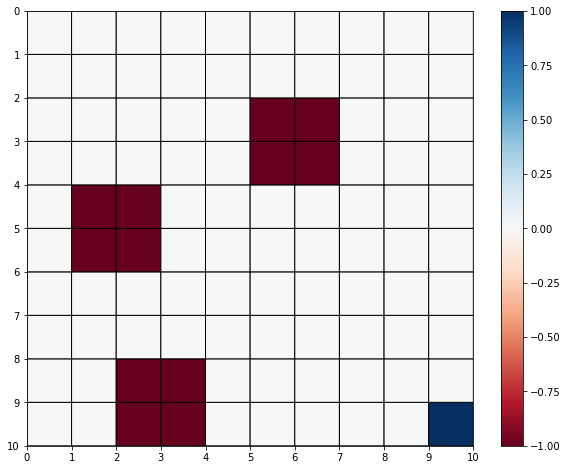

In [7]:
plot_heatmap(reward_map_1)

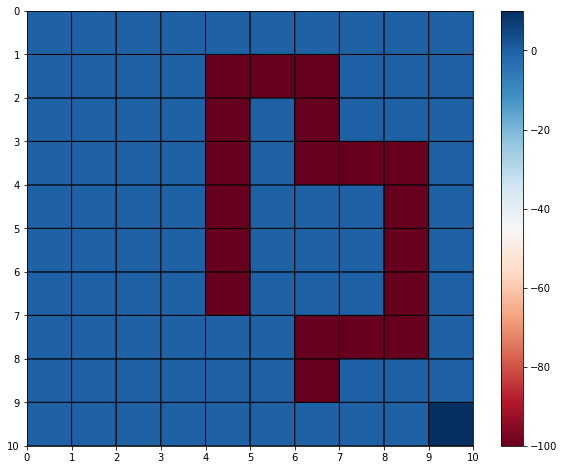

In [8]:
plot_heatmap(reward_map_2)

In [9]:
# given a state action pair, it will generate the next sate distribution and their rewards
# input #
# state:   1-d list with two intergers, eg: [5,8]
# action:  1-d list with fout intergers, one hot encoding, eg: [1,0,0,0] (up, right, down, left)
# reward:  reward map
# w     :  prob
# output #
# state:   list of lists, each list is a possible state.
# prob:    1-d list, each is a probability
# reward:  1-d list, each is a reward
def getProb(state, action, reward, w):
    # get x y
    x, y = state
    
    # init
    new_state = []
    new_prob = []
    new_reward = []
    ori = 0
    
    # get prob
    for mov in [[-1,0],[0,1],[1,0],[0,-1]]:
        mov_x, mov_y = mov
        new_x = x + mov_x
        new_y = y + mov_y
            
        # determine action
        pos = mov_x-2*abs(mov_x)-mov_y-abs(mov_y)+3
        if action[pos] == 1:
            # valid or not
            if new_x >= 0 and new_x <= 9 and new_y >= 0 and new_y <= 9:
                new_state.append([new_x,new_y])
                new_prob.append(1-w+w/4)
                new_reward.append(reward[new_x,new_y])
            else:
                ori += 1-w+w/4
        else:
            # valid or not
            if new_x >= 0 and new_x <= 9 and new_y >= 0 and new_y <= 9:
                new_state.append([new_x,new_y])
                new_prob.append(w/4)
                new_reward.append(reward[new_x,new_y])
            else:
                ori += w/4
    
    # add ori
    if ori > 0:
        new_state.append([x,y])
        new_prob.append(ori)
        new_reward.append(reward[x,y])
    
    return new_state, new_prob, new_reward

# PART 3_ VI  

## Question 2

In [10]:
# save all V
Vs = []

# init
V_old = np.zeros([10,10])
V_new = np.zeros([10,10])

discount = 0.8
w = 0.1
reward = reward_map_1

e = 0.01
d = 1

# begin
while d>=e:
    # for every state
    for x in range(10):
        for y in range(10):
            # new v
            v_max = -100
            
            # for each action
            action = [0 ,0 ,0 ,0]
            for i in range(4):
                action[i] = 1
                new_state, new_prob, new_reward = getProb([x,y], action, reward, w)
                tmp_v = 0
                for j in range(len(new_prob)):
                    tmp_v = tmp_v + new_prob[j] * (new_reward[j] + discount * V_old[new_state[j][0],new_state[j][1]])
                if v_max <= tmp_v:
                    v_max = tmp_v
                action[i] = 0
            
            # update
            V_new[x,y] = v_max
            
    # d
    d = np.max(abs(V_new-V_old))
    V_old = V_new.copy()
            
    # Vs
    Vs.append(V_new.copy())

V = V_new

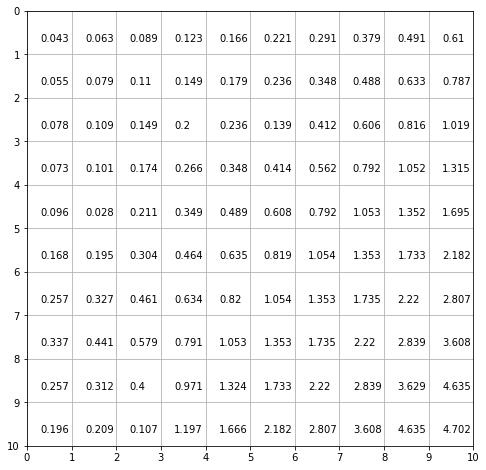

In [11]:
plot_text(V)

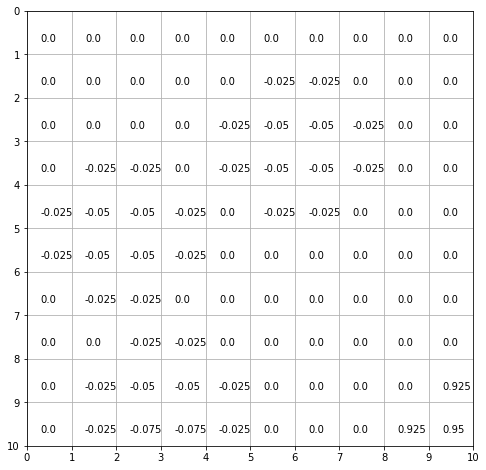

In [12]:
plot_text(Vs[0])

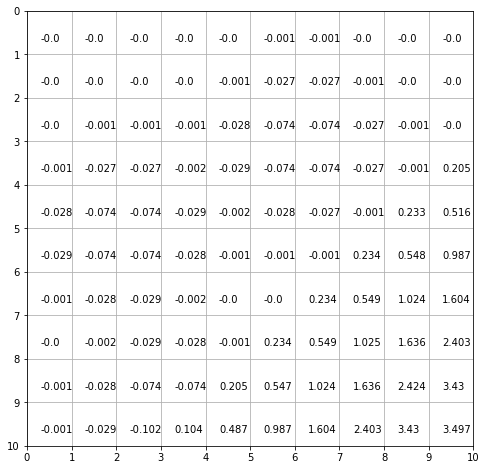

In [13]:
plot_text(Vs[5])

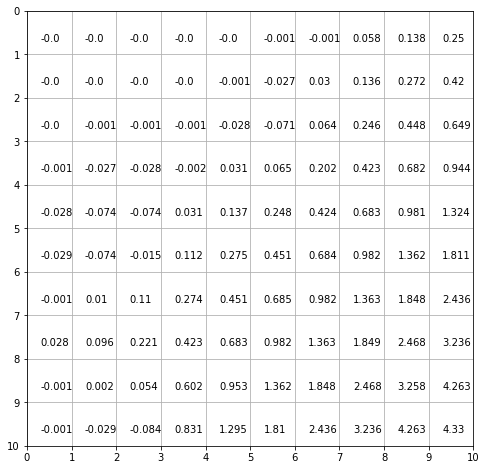

In [14]:
plot_text(Vs[10])

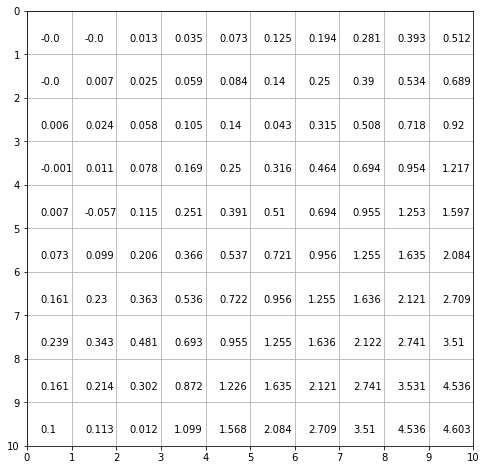

In [15]:
plot_text(Vs[15])

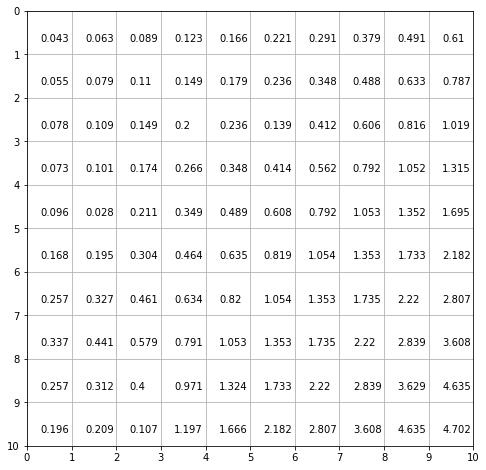

In [16]:
plot_text(Vs[21])

## Question 3

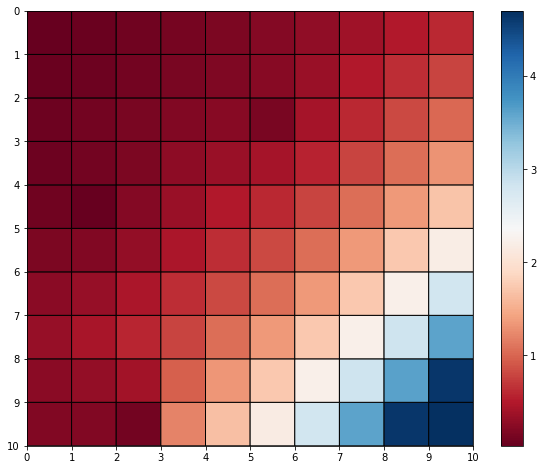

In [17]:
plot_heatmap(V_new)

## Question 4: no code

## Question 5

In [18]:
# init
A = np.zeros([10,10])

# for every state
for x in range(10):
    for y in range(10):
        # new v
        v_max = -100
        a_max = -100
            
        # for each action
        action = [0 ,0 ,0 ,0]
        for i in range(4):
            # get v
            action[i] = 1
            new_state, new_prob, new_reward = getProb([x,y], action, reward, w)
            tmp_v = 0
            for j in range(len(new_prob)):
                tmp_v = tmp_v + new_prob[j] * (new_reward[j] + discount * V[new_state[j][0],new_state[j][1]])
            # max
            if v_max <= tmp_v:
                v_max = tmp_v
                a_max = i
                    
            action[i] = 0
        
        A[x,y] = a_max

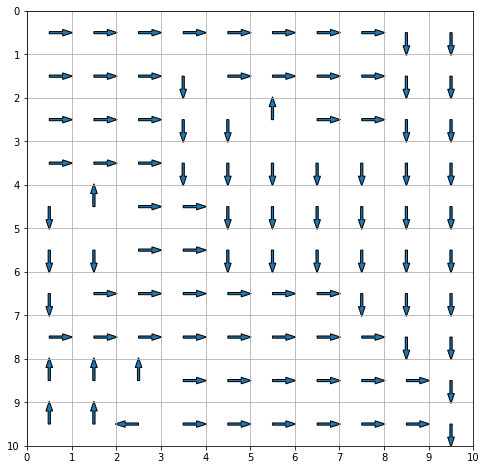

In [19]:
plot_arrow(A)

## Question 6

In [20]:
# save all V
Vs = []

# init
V_old = np.zeros([10,10])
V_new = np.zeros([10,10])

discount = 0.8
w = 0.1
reward = reward_map_2

e = 0.01
d = 1

# begin
while d>=e:
    # for every state
    for x in range(10):
        for y in range(10):
            # new v
            v_max = -100
            
            # for each action
            action = [0 ,0 ,0 ,0]
            for i in range(4):
                action[i] = 1
                new_state, new_prob, new_reward = getProb([x,y], action, reward, w)
                tmp_v = 0
                for j in range(len(new_prob)):
                    tmp_v = tmp_v + new_prob[j] * (new_reward[j] + discount * V_old[new_state[j][0],new_state[j][1]])
                if v_max <= tmp_v:
                    v_max = tmp_v
                action[i] = 0
            
            # update
            V_new[x,y] = v_max
            
    # d
    d = np.max(abs(V_new-V_old))
    V_old = V_new.copy()
            
    # Vs
    Vs.append(V_new.copy())

V = V_new

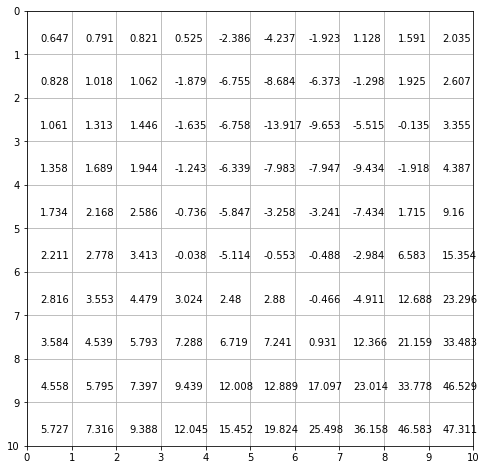

In [21]:
plot_text(V)

## Question 7

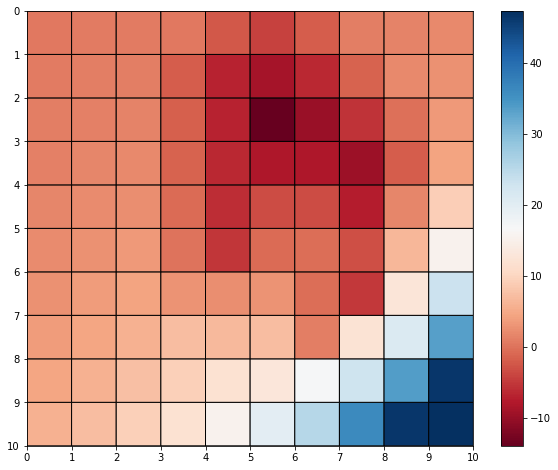

In [22]:
plot_heatmap(V)

## Question 8

In [23]:
# init
A = np.zeros([10,10])

# for every state
for x in range(10):
    for y in range(10):
        # new v
        v_max = -100
        a_max = -100
            
        # for each action
        action = [0 ,0 ,0 ,0]
        for i in range(4):
            # get v
            action[i] = 1
            new_state, new_prob, new_reward = getProb([x,y], action, reward, w)
            tmp_v = 0
            for j in range(len(new_prob)):
                tmp_v = tmp_v + new_prob[j] * (new_reward[j] + discount * V[new_state[j][0],new_state[j][1]])
            # max
            if v_max <= tmp_v:
                v_max = tmp_v
                a_max = i
                    
            action[i] = 0
        
        A[x,y] = a_max

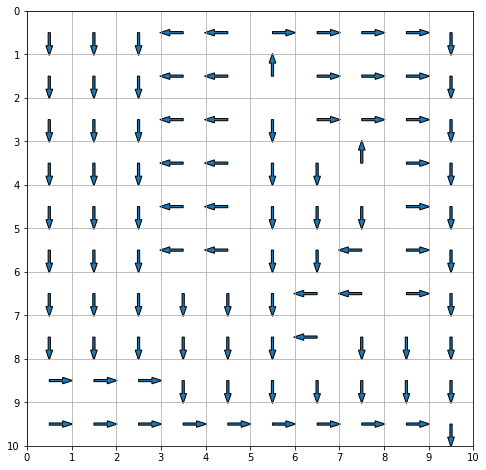

In [24]:
plot_arrow(A)

## Question 9

In [25]:
# save all V
Vs = []

# init
V_old = np.zeros([10,10])
V_new = np.zeros([10,10])

discount = 0.8
w = 0.6
reward = reward_map_2

e = 0.01
d = 1

# begin
while d>=e:
    # for every state
    for x in range(10):
        for y in range(10):
            # new v
            v_max = -100
            
            # for each action
            action = [0 ,0 ,0 ,0]
            for i in range(4):
                action[i] = 1
                new_state, new_prob, new_reward = getProb([x,y], action, reward, w)
                tmp_v = 0
                for j in range(len(new_prob)):
                    tmp_v = tmp_v + new_prob[j] * (new_reward[j] + discount * V_old[new_state[j][0],new_state[j][1]])
                if v_max <= tmp_v:
                    v_max = tmp_v
                action[i] = 0
            
            # update
            V_new[x,y] = v_max
            
    # d
    d = np.max(abs(V_new-V_old))
    V_old = V_new.copy()
            
    # Vs
    Vs.append(V_new.copy())

V = V_new

# init
A = np.zeros([10,10])

# for every state
for x in range(10):
    for y in range(10):
        # new v
        v_max = -100
        a_max = -100
            
        # for each action
        action = [0 ,0 ,0 ,0]
        for i in range(4):
            # get v
            action[i] = 1
            new_state, new_prob, new_reward = getProb([x,y], action, reward, w)
            tmp_v = 0
            for j in range(len(new_prob)):
                tmp_v = tmp_v + new_prob[j] * (new_reward[j] + discount * V[new_state[j][0],new_state[j][1]])
            # max
            if v_max <= tmp_v:
                v_max = tmp_v
                a_max = i
                    
            action[i] = 0
        
        A[x,y] = a_max

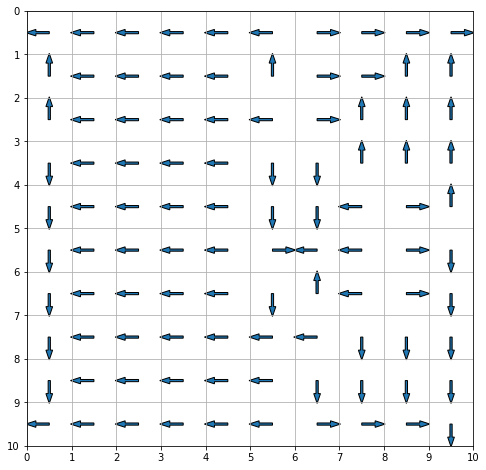

In [26]:
plot_arrow(A)

In [29]:
# save all V
Vs = []

# init
V_old = np.zeros([10,10])
V_new = np.zeros([10,10])

discount = 0.8
w = 0.2
reward = reward_map_2

e = 0.01
d = 1

# begin
while d>=e:
    # for every state
    for x in range(10):
        for y in range(10):
            # new v
            v_max = -100
            
            # for each action
            action = [0 ,0 ,0 ,0]
            for i in range(4):
                action[i] = 1
                new_state, new_prob, new_reward = getProb([x,y], action, reward, w)
                tmp_v = 0
                for j in range(len(new_prob)):
                    tmp_v = tmp_v + new_prob[j] * (new_reward[j] + discount * V_old[new_state[j][0],new_state[j][1]])
                if v_max <= tmp_v:
                    v_max = tmp_v
                action[i] = 0
            
            # update
            V_new[x,y] = v_max
            
    # d
    d = np.max(abs(V_new-V_old))
    V_old = V_new.copy()
            
    # Vs
    Vs.append(V_new.copy())

V = V_new

# init
A = np.zeros([10,10])

# for every state
for x in range(10):
    for y in range(10):
        # new v
        v_max = -100
        a_max = -100
            
        # for each action
        action = [0 ,0 ,0 ,0]
        for i in range(4):
            # get v
            action[i] = 1
            new_state, new_prob, new_reward = getProb([x,y], action, reward, w)
            tmp_v = 0
            for j in range(len(new_prob)):
                tmp_v = tmp_v + new_prob[j] * (new_reward[j] + discount * V[new_state[j][0],new_state[j][1]])
            # max
            if v_max <= tmp_v:
                v_max = tmp_v
                a_max = i
                    
            action[i] = 0
        
        A[x,y] = a_max

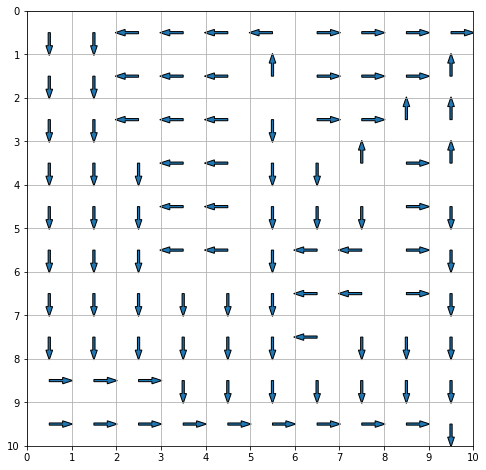

In [30]:
plot_arrow(A)